In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [2]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 3차원 텐서를 1차원 벡터로 변환
cnn.add(Dense(128, activation='relu')) # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) # 출력층

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 15s 11ms/step - loss: 0.5202 - accuracy: 0.8171 - val_loss: 0.3363 - val_accuracy: 0.8787
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3387 - accuracy: 0.8790 - val_loss: 0.2855 - val_accuracy: 0.8934
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2905 - accuracy: 0.8959 - val_loss: 0.2683 - val_accuracy: 0.9009
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2629 - accuracy: 0.9039 - val_loss: 0.2509 - val_accuracy: 0.9090
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2385 - accuracy: 0.9130 - val_loss: 0.2407 - val_accuracy: 0.9120
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2195 - accuracy: 0.9190 - val_loss: 0.2435 - val_accuracy: 0.9114
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2021 - accuracy: 0.9269 - val_loss: 0.2168 - val_accuracy: 0.9225
E

In [3]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9328


[0.2828880846500397, 0.9327999949455261]

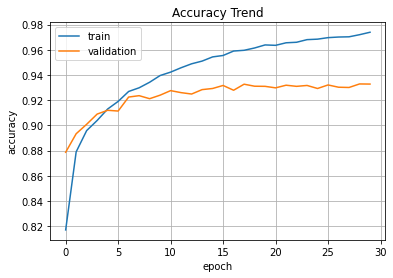

In [4]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

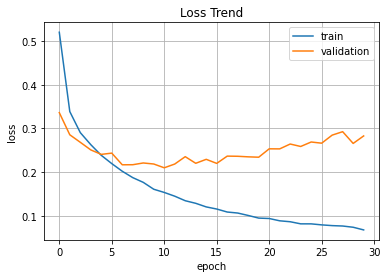

In [5]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()